# Stick slip cycles

## Velocity-dependent, static-kinematic type friction

You have explored Amonton's friction law which says that the shear stress needed to start moving two frictional surface against each other, $\tau_s$, is given by $\tau_ = \mu_s \sigma_n$ where $\mu_s$ is the _static_ friction coefficient, and $\sigma_n$ the normal stress. 
As your experiments with the inclined plane showed, $\mu$ is called the _internal angle of friction_ as it relates to the critical slope where a block would start moving as $\mu = \tan(\phi)$, i.e. the plane has to be at an angle of $\arctan(\mu)$ for sliding.


Friction can be quite complicated, but the first step to move beyond Amonton is to allow for a sliding friction when the surface is moving, the _dynamic_ friction $\mu_d$, such that $\tau_s = \mu_s \sigma_n$, with $\mu_s < \mu_d$, typically.

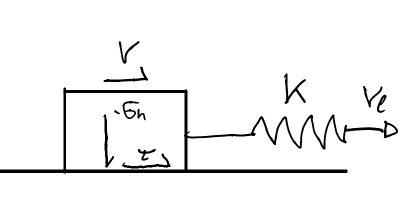

Let's assume that there is a constant loading velocity, $v_0$, extending a spring coupled to a frictional slider, just like in the stick-slip demonstration where we explored a number of different rough sliding surfaces and loading speeds.

If $x$ is the location of the slider, and $x_l$ the location of the load, and if $x_l=0$ at $t=0$, then $x_l = t v_l$. Hooke's law says that the pull force stored in the spring is 

$F_s= k \delta x = k (x-x_l) = k (x-t v_l).$ 

This is a load on the mass of the slider such that we get an equation like 

$F_i + F_f(\dot{x})+ F_s =0$ 

where $F_i$ is inertia, $F_i = m \ddot{x}$, as for the harmonic oscillator, and $F_f(\dot{x})$ a velocity-dependent friction, which is like the damping term of the harmonic oscillator from before. If $\mu(\dot{x})$, then $F_f =  -\mathrm{sgn}(\dot{x}) \sigma_n  \mu$, with normal force $\sigma_n$, where $\mathrm{sgn}$ is the sign function, which is 1 or -1, depending on its argument being $>0$ or $<0$, to account for the direction of the pull, and friction resisting it.

Let us first define a velocity dependent friction function, and, say, have a smooth sort of drop in frction to hopefully make things better behaved. We can do this by using a linear decay, or by using 
the $\arctan$ function, not because trigonometry is involved, but because it is nice and smooth. Check out what happens for the different formulations.

In [2]:
import numpy    as     np
import matplotlib.pyplot as plt
from   scipy import integrate
from dataclasses import dataclass,astuple,asdict # for C-like structure

# compute a velocity dependent friction, dropping from mu_s to mu_d over some distance vmax from zero
def friction(vel,mu_d,mu_s,vmax): 
    vela = np.abs(vel);
    fric = np.ones(np.size(vel))* mu_d;
    ind1 = np.where(vela < vmax)
    fric[ind1] = mu_d + (mu_s-mu_d)*(1-vela[ind1]/vmax)
    #fric = mu_d + (mu_s-mu_d)*(np.arctan((.5-vela)/.05)/vmax +.5)
    return fric 

Everytime we have a new function, let's make sure it works, by plotting it. This is what I mean by "check it out".

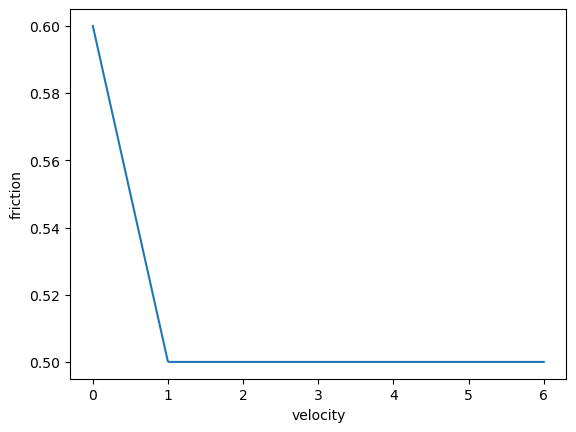

In [3]:
vmax = 1
mu_s=0.6;mu_d=0.5
vel = np.linspace(0,vmax*6,500)
fric = friction(vel,mu_d,mu_s,vmax)                  
plt.plot(vel,fric);plt.xlabel('velocity');plt.ylabel('friction')
plt.show()

Does it look OK? Later, see what happens if you change $\mu_d$, $\mu_s$, and $v_{max}$, for example. 

Now, for the ODEs to solve the slider problem where this friction applies, let's be inspired by the harmonic oscillator from last time. 

\begin{align}
F_g + F_f + F_s = 0
\end{align}
or
\begin{align}
m \ddot{x} -   \mathrm{sgn}(\dot{x}) \sigma_n \mu(\dot{x}) + k(x-t v_l) = 0
\end{align}

such that inertia is balanced by the frictional force, and driven by the continuously extending spring, driven by $v_l$. 
Again, introduce $\dot{x} = y$ to only have first order derivatives with time. Then, 

\begin{align}
m \dot{y} - \mathrm{sgn}(\dot{x})  \sigma_n  \mu(y) = -k(x-tv_l)\\
\dot{y} = \frac{-k(x-tv_0)+ \mathrm{sgn}(\dot{x})  \sigma_n  \mu(y)}{m}\\
\end{align}

These are the two equations we will solve, for the displacement and the velocity, respectively. 
We can write as computer code for the ODE solver from before, using our friction function, and first defining a class of parameters which default values.

In [9]:
@dataclass
class parameters:
    m    :float = 1 # mass
    k    :float = 1 # spring stiffness
    mu_s :float = 0.6 # static friction
    mu_d :float = 0.5 # dynamic friction
    sn   :float = 1 # normal force
    v0   :float = 1 # load point velocity
    vmax :float = 1 # scale of frictional reduction
    beta :float = 0 # damping if any

def dxdt(x,t,     m,k,mu_s,mu_d,sn,v0,vmax,beta): 
    f0 = x[1]
    #f1 = -(k*(x[0]-t*v0) + np.sign(x[1])*par.sn*friction([x[1]],mu_d,mu_s,vmax))/m 
    # The above code will return 'setting an array element with a sequence' error.
    f1 = ( - k*(x[0]-t*v0)  + np.sign(x[1])*sn*friction([x[1]],mu_d,mu_s,vmax)[0])/m 
    return [f0, f1]

def ode_solver_scipy(xInit,t, par):
    sol     = integrate.odeint(dxdt, xInit, t, astuple(par), rtol=1e-16)
    return sol

Let's see what this system does. Try a few combinations of $v_0$ and $k$, say vary both between 1 and 100, e.g. 1, 5, 10, 50, 100. Does this look like what you got in the experiments? 

Explore by changing the frictional parameters, the pull, the stiffness, the mass, whatever you can think of. Plot the displacement against time, the pulling force against time, displacement against velocity.

Text(0, 0.5, 'force')

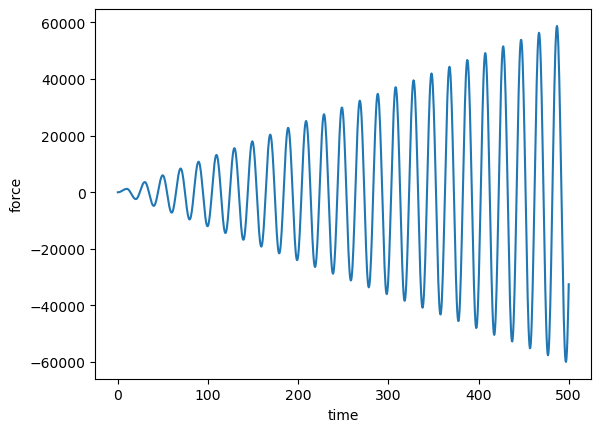

In [10]:
x0 = [0, 0.0001]
tmax=500
nsteps = 1000
t = np.linspace(0,tmax,nsteps)

par        = parameters()
par.k=??
par.v0=??
par.mu_d=???
par.sn=???


x   = ode_solver_scipy(x0,t,par)

#force=par.k*(???-t*par.v0)

# plot !

## Quasi-static rate state friction without inertia but possibly more than one state variable. 

The rate- and state friction is described by the following governing equations are in general something like

\begin{align}
\tau = F[V, \theta_1, \theta_2, ... ] \\
\dot \theta_1 = G_1[V, \theta_1, \theta_2, ...] \\ 
\dot \theta_2 = G_2[V, \theta_1, \theta_2, ...] \\ 
...
\end{align}
where we might allow for more than one state variable, $\theta_1$, $\theta_2$, $\ldots$, with 

$\mu = \mu_0 + a \ln\left(\frac{v}{v_0}\right) + b_1 \ln\left(\frac{\theta_1}{\theta_0}\right) + b_2 \ln\left(\frac{\theta_2}{\theta_0}\right)$, 

with $\theta_0 = \frac{D_c}{v_0}$, and we will now use a different, the Ruina, _slip law_ version of the state variable evolution laws

$
\dot{\theta}_i = -\frac{v}{D_c} \left(\theta_i + b_i \log\frac{v}{v_0}\right).
$


The simpliest form of interaction between the rate and state friction and elastic deformation is described by the one degree spring-slider system governed by the rate and state friction where we now do only consider quasi-dynamic sliding, not using the mass/inertia. 

Following Gu et al. (1984), we can rewrite the equations and solve for  a logarithmic sliding velocity

$
x = \ln\left(\frac{v}{v_0}\right),
$

and a normalized friction difference from the reference, or shear stress, since $\tau = \mu \sigma_n$ and we hold $\sigma_n$ constant,


$
y = \frac{\tau - \tau_0}{a},
$

with $\Theta=\frac{\theta}{a}$ a non-dimensional state variable 

$
\Theta_i =\beta_i \log\left(\frac{\theta_i}{\theta_0}\right),
$

where $\beta = \frac{b}{a}$.

With a non-dimensional stiffness, $\kappa = \frac{k D_c}{a\sigma_n}$, the governing equations for the evolution of ${\bf x}=\{x,y,v'_l\}$ can be written as 

\begin{align}
\frac{d x}{dT} &= e^x (-\kappa + y + \lambda x) + \kappa v'_l  \\
\frac{d y}{dT} &= \kappa (v'_l - e^x) \\
\frac{d v_l}{dT} &= v'_l\\
\end{align}

where $T=\frac{t}{\theta_0}$ is a non-dimensionalized time, $v_l'=v_l/v_0$, $\lambda = \beta-1$, and a critical stiffness can be derived as

$
\kappa_c = \lambda = \beta-1 = \frac{b-a}{a},
$

and the system could be further condensed into a 2-D description, but we carry three variables explcitly for simplicity.


In [6]:
# Solve an elastic spring-slider system governed by the rate and state friction.
# A numerical implementation of Gu et al. (1984).
@dataclass
class rs2_parameters:
    kappa:float = 1 # non-dim stiffness, normalized to kappa_c, i.e. in multiples of lambda 
    mu_0 :float = 0.6
    a    :float = 0.01
    b    :float = 0.015
    Dc   :float = 1
    mode :int   = 1
        
def dxdt(x, t, kappa,mu_0,a,b,Dc,mode): # x,y,z = x,y,v'_l; x = log(v/v_0); y = (t-t_0)/a

    llambda  = b/a -1
    k   = kappa * llambda 
    v0      = loadHist(t, mode)
    exp_x = np.exp(x[0])
    
    f0 = exp_x*(-k + x[1] + llambda*x[0]) + k*v0
    f1 = k * (v0 - exp_x)
    f2 = v0
    
    return [f0,f1,f2]

# loadHist defines the loading (velocity) profiles for the whole time series.
# various experiments are defined by the parameter mode. 
def loadHist(t, mode):
    v           = 0
    if mode   == 1:
        if t   < 0: 
            v   = 1
        elif t < 5:
            v   = 3
        else:
            v   = 1
    elif mode == 2:
        v       = 1
    return v


Now, let's see what this does for different values of $\kappa_c$. Change $\kappa$ from 50, 5, 1 $\kappa_c$, for example. 

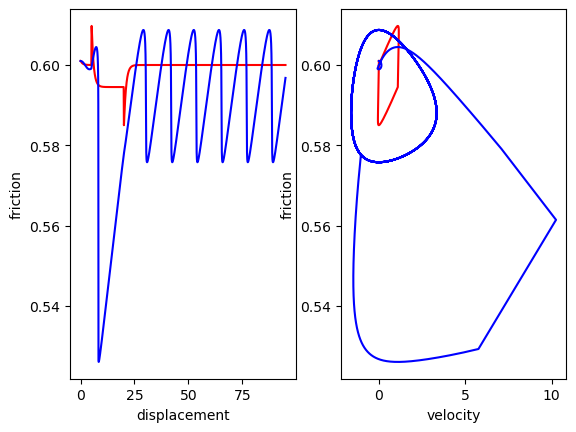

In [7]:
par       = rs2_parameters()
Nt        = 100000
t         = np.linspace(-5., 80., Nt)
par.kappa = 50
x0     = [0, .1, 0.]
x1   = ode_solver_scipy(x0,t,par)
par.kappa = 1
x2   = ode_solver_scipy(x0,t,par)

fric1=par.mu_0 + x1[:,1]*par.a
fric2=par.mu_0 + x2[:,1]*par.a

plt.subplot(1,2,1)
plt.plot(x1[:,2],fric1, 'red',x2[:,2],fric2,'blue')
plt.xlabel("displacement")
plt.ylabel("friction")

plt.subplot(1,2,2)
plt.plot(x1[:,0],fric1,'red',x2[:,0],fric2,'blue')
plt.xlabel("velocity")
plt.ylabel("friction")
plt.show()

What is happening? Can you analyze the phase space behavior? What might the system do, i.e. what are possible curves?